# Вторая лабораторная работа

In [1]:
import thinkdsp as td
import numpy as np
PI2 = np.pi * 2

## Задание 1. 
Описать класс пилообразного сигнала

In [2]:
class SawtoothSignal(td.Sinusoid): 
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = td.normalize(td.unbias(frac), self.amp)
        return ys

In [3]:
sawSignal = SawtoothSignal().make_wave(duration=0.5, framerate=44100)
square_signal = td.SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=44100)
triangle_signal = td.TriangleSignal(amp=0.8).make_wave(duration=0.5, framerate=44100)

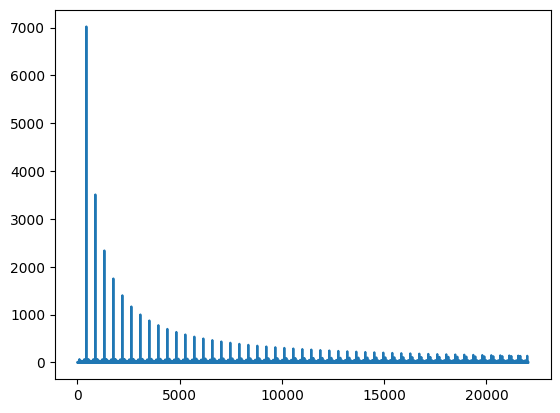

In [4]:
sawSignal.make_spectrum().plot()

Сравним спектры пилообразного сигнала, с прямоугольным и треугольным сигналами

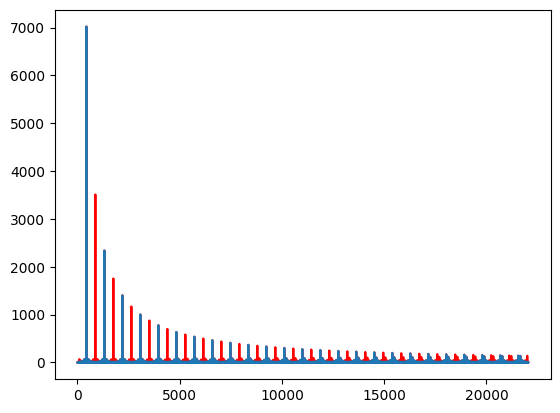

In [5]:
sawSignal.make_spectrum().plot(color="red")
square_signal.make_spectrum().plot()

Прямоугольный сигнал включает в себя только нечётные гармоники. Пилообразный включает в себя и чётные, и нечётные гармоники
Спадают они аналогичным образом

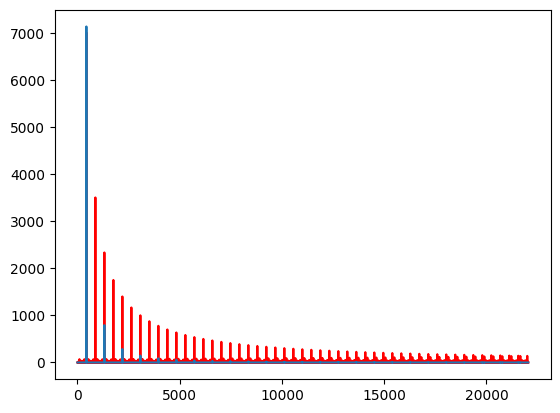

In [6]:
sawSignal.make_spectrum().plot(color="red")
triangle_signal.make_spectrum().plot()

Спектр треугольного сигнала спадает быстрее, и также включает в себя только нечётные гармоники.

## Задание 2. 
Создать прямоугольный сигнал. Обнаружить эффект биения

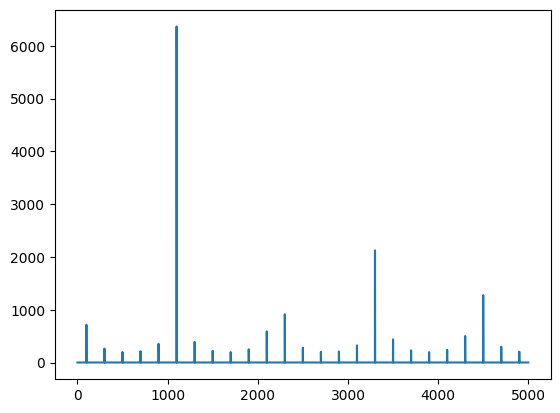

In [7]:
square_signal = td.SquareSignal(freq=1100).make_wave(framerate=10000)
square_signal.make_spectrum().plot()

In [8]:
square_signal.make_audio()

Из-за биений звук стал гудящим, неприятным на слух.

## Задание 3. 
Создать треугольный сигнал. Установить Spectrum.hs[0] = 100

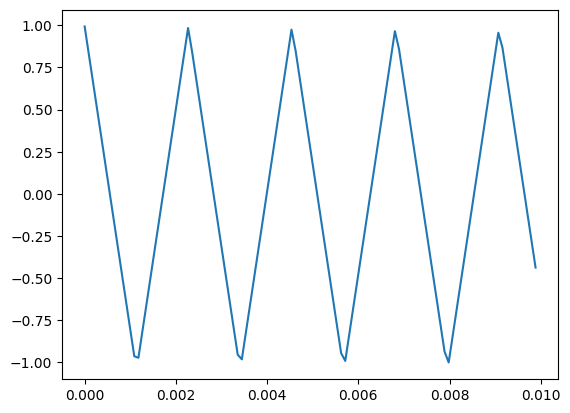

In [9]:
triangle_signal = td.TriangleSignal(440).make_wave(duration=0.01)
triangle_signal.plot()

(1.0436096431476471e-14+0j)


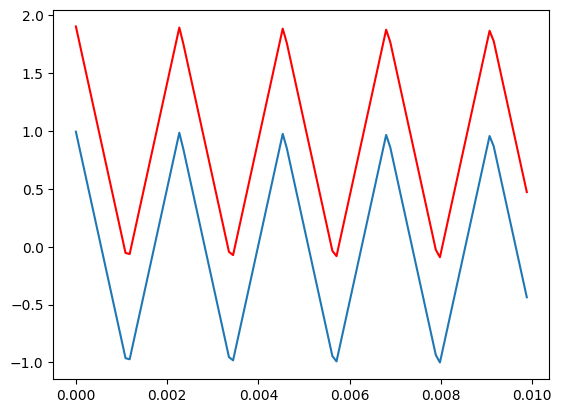

In [10]:
triangle_spectrum = triangle_signal.make_spectrum()
print(triangle_spectrum.hs[0])
triangle_spectrum.hs[0] = 100
triangle_spectrum.make_wave().plot(color="red")
triangle_signal.plot()

Таким образом видно, что первая компонента hs отвечает за смещение волны по вертикали. Вторая волна, у которой hs[0] = 100, сдвинулась относительно первой волны на 1 вверх. 

## Задание 4. 
Написать функцию, принимающую Spectrum как параметр, изменяющую его делением каждого элемента hs на соответствующую частоту fs. hs[0] = 0

In [11]:
def divide_spectrum(self):
    self.hs[1:] /= self.fs[1:]
    self.hs[0] = 0

In [12]:
triangle_signal = td.TriangleSignal(440).make_wave(duration=0.5, framerate=44100)

In [13]:
triangle_signal.make_audio()

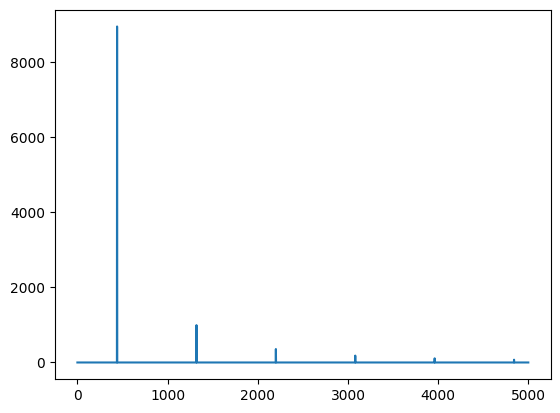

In [14]:
triangle_signal.make_spectrum().plot(5000)

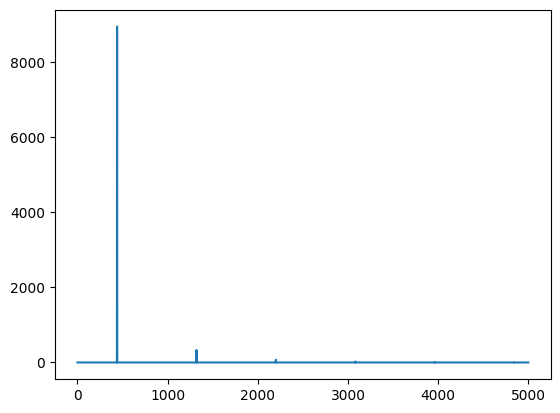

In [15]:
triangle_spectrum = triangle_signal.make_spectrum()
divide_spectrum(triangle_spectrum)
triangle_spectrum.scale(440)
triangle_spectrum.plot(5000)

In [16]:
triangle_spectrum.make_wave().make_audio()

Преобразованные таким образом сигналы начинают звучать ближе к синусоидальному.

## Задание 5. 
Найти сигнал, состоящий из чётных и нечётных гармоник, спадающих пропорционально 1/f^2
Для этого используем пилообразный сигнал, и преобразуем с помощью ранее созданной функции

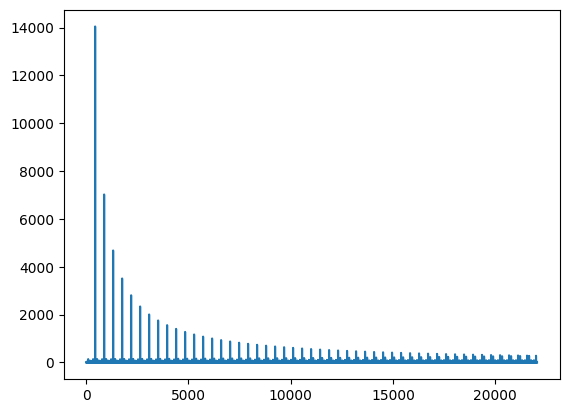

In [21]:
sawtooth_signal = td.SawtoothSignal(440).make_wave(duration=1, framerate=44100)
sawtooth_signal.make_spectrum().plot()

In [22]:
sawtooth_signal.make_audio()

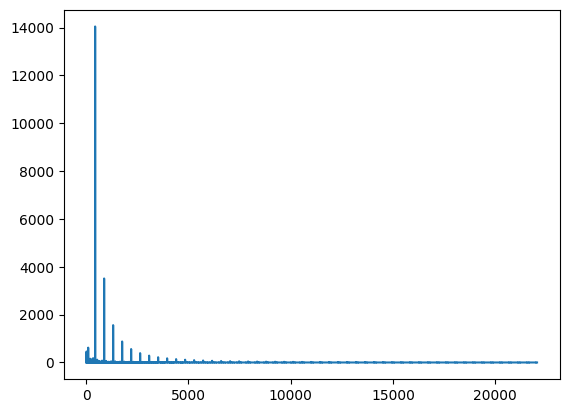

In [23]:
sawtooth_spectrum = sawtooth_signal.make_spectrum()
divide_spectrum(sawtooth_spectrum)
sawtooth_spectrum.scale(440)
sawtooth_spectrum.plot()

In [24]:
sawtooth_spectrum.make_wave().make_audio()